# VARIABLE GENDER - ANALYSIS

In [1]:
# Dependencies and Setup
#%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns
#sns.set_style('white')

#Formating for the entire script
pd.options.display.float_format = "{:,.2f}".format

# Getting the data

In [2]:
# Codes for each Data Frame

Data_path_df = pd.read_csv('Data/National_Data.csv')

# Pulling Data to verify source 
Data_path_df.head()

,yearid,fipscode,raceid,ageid,genderid,educationid,indicatorid,miscid,datasourceid,estimateid,SuppressID,datasetid,GeoLevel,Estimate,SeEstimate,LowerLimit,UpperLimit,Unnamed: 17,Unnamed: 18
0,1980,-1,0,5,0,0,1,0,30,61,0,40,National,1,0.1,0.9,1.2,NaN,NaN
1,1980,-1,0,5,0,0,1,0,30,101,0,40,National,915,76,764,1065,NaN,NaN
2,1980,-1,0,6,0,0,1,0,3,61,0,3,National,5.4,0.3,4.8,6,NaN,NaN
3,1980,-1,0,6,0,0,1,0,3,101,0,3,National,2337,143,2054,2621,NaN,NaN
4,1980,-1,0,6,0,0,1,0,30,61,0,40,National,5.4,0.3,4.8,6,NaN,NaN


# Data Frame & identify principal variables for Race

In [3]:
# Setting up the value data set that will help us class the Diabetes per Gender

Data_gender_df = Data_path_df.loc[:,["yearid", "ageid", "genderid", "datasetid", "estimateid", "Estimate"]]
    
Data_gender_df.head()

,yearid,ageid,genderid,datasetid,estimateid,Estimate
0,1980,5,0,40,61,1
1,1980,5,0,40,101,915
2,1980,6,0,3,61,5.4
3,1980,6,0,3,101,2337
4,1980,6,0,40,61,5.4


# Filter columns by Gender-male variable (1,000 inhabits)

In [4]:
# Pulling Total of Diabetes Cases and the breakdown by every 1,000 

male_gender_totals_df = Data_gender_df.loc[(Data_gender_df["yearid"] >= 2000) & (Data_gender_df["ageid"]== 99) & \
                                  (Data_gender_df["genderid"]== 1) & (Data_gender_df["datasetid"]== 3) & \
                                  (Data_gender_df["estimateid"]== 101)].dropna()
    
male_gender_totals_df = male_gender_totals_df.reset_index()
male_gender_totals_df
    

,index,yearid,ageid,genderid,datasetid,estimateid,Estimate
0,1367,2000,99,1,3,101,5952
1,1434,2001,99,1,3,101,6472
2,1501,2002,99,1,3,101,6856
3,1568,2003,99,1,3,101,7023
4,1635,2004,99,1,3,101,7629
5,1702,2005,99,1,3,101,7957
6,1769,2006,99,1,3,101,8291
7,1836,2007,99,1,3,101,8447
8,1903,2008,99,1,3,101,9018
9,1970,2009,99,1,3,101,10538


# Filter columns by Gender-female variable (1,000 inhabits)

In [5]:
female_gender_totals_df = Data_gender_df.loc[(Data_gender_df["yearid"] >= 2000) & (Data_gender_df["ageid"]== 99) & \
                                  (Data_gender_df["genderid"]== 2) & (Data_gender_df["datasetid"]== 3) & \
                                  (Data_gender_df["estimateid"]== 101)].dropna()
    
female_gender_totals_df = female_gender_totals_df.reset_index()
female_gender_totals_df

,index,yearid,ageid,genderid,datasetid,estimateid,Estimate
0,1371,2000,99,2,3,101,6100
1,1438,2001,99,2,3,101,6642
2,1505,2002,99,2,3,101,6632
3,1572,2003,99,2,3,101,7074
4,1639,2004,99,2,3,101,7612
5,1706,2005,99,2,3,101,8366
6,1773,2006,99,2,3,101,9029
7,1840,2007,99,2,3,101,8950
8,1907,2008,99,2,3,101,9791
9,1974,2009,99,2,3,101,10129


# Merging male & female df's

In [6]:
Gender_totals_graph = pd.merge(male_gender_totals_df,female_gender_totals_df, how='outer')
Gender_totals_graph_df = Gender_totals_graph.loc[:,["genderid", "Estimate"]]
Gender_totals_graph_df.head()

,genderid,Estimate
0,1,5952
1,1,6472
2,1,6856
3,1,7023
4,1,7629


In [7]:
Gender_totals_graph_df

,genderid,Estimate
0,1,5952
1,1,6472
2,1,6856
3,1,7023
4,1,7629
5,1,7957
6,1,8291
7,1,8447
8,1,9018
9,1,10538


# Filter columns by Gender-male variable (%)

In [8]:
# Pulling Total of Diabetes Cases and the breakdown 

male_gender_porcentage_df = Data_gender_df.loc[(Data_gender_df["yearid"] >= 2000) & (Data_gender_df["ageid"]== 99) & \
                                  (Data_gender_df["genderid"]== 1) & (Data_gender_df["datasetid"]== 3) & \
                                  (Data_gender_df["estimateid"]== 61)].dropna()
    
male_gender_porcentage_df = male_gender_porcentage_df.reset_index()
male_gender_porcentage_df
    
    #Male_gender_df =  Male_gender_df.reset_index()
    #Male_gender_df


,index,yearid,ageid,genderid,datasetid,estimateid,Estimate
0,1366,2000,99,1,3,61,4.5
1,1433,2001,99,1,3,61,4.8
2,1500,2002,99,1,3,61,5
3,1567,2003,99,1,3,61,5
4,1634,2004,99,1,3,61,5.4
5,1701,2005,99,1,3,61,5.6
6,1768,2006,99,1,3,61,5.8
7,1835,2007,99,1,3,61,5.8
8,1902,2008,99,1,3,61,6.2
9,1969,2009,99,1,3,61,7.1


# # Filter columns by Gender-female variable (%)

In [9]:
female_gender_porcentage_df = Data_gender_df.loc[(Data_gender_df["yearid"] >= 2000) & (Data_gender_df["ageid"]== 99) & \
                                  (Data_gender_df["genderid"]== 2) & (Data_gender_df["datasetid"]== 3) & \
                                  (Data_gender_df["estimateid"]== 61)].dropna()
    
female_gender_porcentage_df = female_gender_porcentage_df.reset_index()
female_gender_porcentage_df

,index,yearid,ageid,genderid,datasetid,estimateid,Estimate
0,1370,2000,99,2,3,61,4.3
1,1437,2001,99,2,3,61,4.7
2,1504,2002,99,2,3,61,4.6
3,1571,2003,99,2,3,61,4.8
4,1638,2004,99,2,3,61,5.2
5,1705,2005,99,2,3,61,5.6
6,1772,2006,99,2,3,61,6
7,1839,2007,99,2,3,61,5.9
8,1906,2008,99,2,3,61,6.4
9,1973,2009,99,2,3,61,6.6


# Merging male & female % df's

In [10]:
#Combine both genders in a filtered table

Gender_porcentage_graph = pd.merge(male_gender_porcentage_df,female_gender_porcentage_df, how='outer')
Gender_porcentage_graph_df = Gender_porcentage_graph.loc[:,["genderid", "Estimate"]]
Gender_porcentage_graph_df.head()


,genderid,Estimate
0,1,4.5
1,1,4.8
2,1,5
3,1,5
4,1,5.4


In [11]:
#An error was not letting me pull the plot because "Estimate" was showing as Object. Now with the conversion of "Estimate" to float Plot is successfuly showing.
Gender_totals_graph_df['Estimate'] = pd.to_numeric(Gender_totals_graph_df['Estimate'])
Gender_totals_graph_df.dtypes

genderid    int64
Estimate    int64
dtype: object

In [12]:
Gender_porcentage_graph_df.head()

,genderid,Estimate
0,1,4.5
1,1,4.8
2,1,5
3,1,5
4,1,5.4


In [13]:
Gender_totals_graph_df.loc[(Gender_totals_graph_df["genderid"]== 1),["Estimate"]]

,Estimate
0,5952
1,6472
2,6856
3,7023
4,7629
5,7957
6,8291
7,8447
8,9018
9,10538


# Plot results

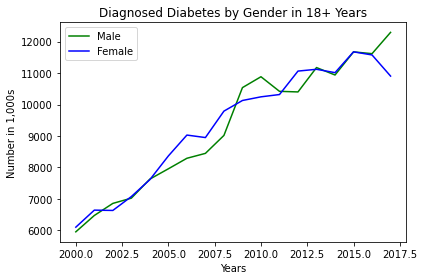

In [44]:
#Gender_graph = male_gender_df.plot(kind="bar", figsize=(20,3)) + female_gender_df.plot(kind="bar", figsize=(20,3))

#Gender_graph.set_xticklabels(male_gender_df["Estimate"], rotation=45)

years =np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
Male_diabetes_totals = Gender_totals_graph_df.loc[(Gender_totals_graph_df["genderid"]== 1),["Estimate"]]
Female_diabetes_totals = Gender_totals_graph_df.loc[(Gender_totals_graph_df["genderid"]== 2),["Estimate"]]


plt.plot(years, Male_diabetes_totals, color="green", label="Male")
plt.plot(years, Female_diabetes_totals, color="blue", label="Female")

plt.title("Diagnosed Diabetes by Gender in 18+ Years")
plt.ylabel("Number in 1,000s")
plt.xlabel("Years")

plt.legend()
plt.tight_layout()
plt.savefig("Figures/Diagnosed Diabetes by Gender in 18+ Years", bbox_inches = "tight")

plt.show()


In [15]:
#An error was not letting me pull the plot because "Estimate" was showing as Object. Now with the conversion of "Estimate" to float Plot is successfuly showing.
Gender_porcentage_graph_df['Estimate'] = pd.to_numeric(Gender_porcentage_graph_df['Estimate'])
Gender_porcentage_graph_df.dtypes

genderid      int64
Estimate    float64
dtype: object

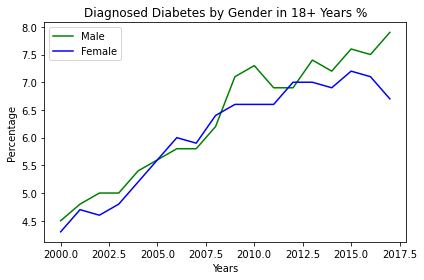

In [46]:
#Gender_graph = male_gender_df.plot(kind="bar", figsize=(20,3)) + female_gender_df.plot(kind="bar", figsize=(20,3))

#Gender_graph.set_xticklabels(male_gender_df["Estimate"], rotation=45)

years =np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
Male_diabetes_porcentage =  Gender_porcentage_graph_df.loc[(Gender_porcentage_graph_df["genderid"]== 1),["Estimate"]]
Female_diabetes_porcentage = Gender_porcentage_graph_df.loc[(Gender_porcentage_graph_df["genderid"]== 2),["Estimate"]]

plt.plot(years, Male_diabetes_porcentage, color="green", label="Male")
plt.plot(years, Female_diabetes_porcentage, color="blue", label="Female")

plt.title("Diagnosed Diabetes by Gender in 18+ Years %")
plt.ylabel("Percentage")
plt.xlabel("Years")

plt.legend()
plt.tight_layout()
plt.savefig("Figures/Diagnosed Diabetes by Gender in 18+ Years %", bbox_inches = "tight")

plt.show()


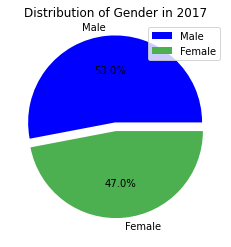

In [47]:
y = np.array([53, 47])

mylabels = ["Male","Female"]
mycolors = ["b", "#4CAF50"]
myexplode = [0.1, 0]


plt.pie(y, labels =mylabels, colors = mycolors, explode=myexplode, autopct="%1.1f%%")
plt.legend(loc="best")
plt.title("Distribution of Gender in 2017")
plt.savefig("Figures/Distribution of Gender in 2017", bbox_inches = "tight")

plt.show()
